<a href="https://colab.research.google.com/github/S-aakash21/ML_projects/blob/main/DECISION_TREE_CLASSIFIER_USING_BANK_SERVICE_DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Week 3 GEN AI -DECISION TREE CLASSIFIER

Analyze the data in "/content/bank-additional-full.csv" to build a Decision Tree Classifier that predicts customer purchase behavior. The analysis should include loading the data, encoding categorical features, splitting the data into training and testing sets, training a Decision Tree model with the entropy criterion, evaluating the model using accuracy and a classification report, and visualizing the trained decision tree.

## Load the data


In [1]:
import pandas as pd

df = pd.read_csv("/content/bank-additional-full.csv")
display(df.head())

,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""
0,"56;""housemaid"";""married"";""basic.4y"";""no"";""no"";..."
1,"57;""services"";""married"";""high.school"";""unknown..."
2,"37;""services"";""married"";""high.school"";""no"";""ye..."
3,"40;""admin."";""married"";""basic.6y"";""no"";""no"";""no..."
4,"56;""services"";""married"";""high.school"";""no"";""no..."


**Reasoning**:
The data appears to be delimited by semicolons instead of commas, causing all columns to be read as a single column. I need to reload the data with the correct delimiter.



In [2]:
df = pd.read_csv("/content/bank-additional-full.csv", sep=';')
display(df.head())

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Separate features and target
Separate the DataFrame into features (X) and the target variable (y), which is the 'y' column in this dataset.


In [3]:
X = df.drop('y', axis=1)
y = df['y']
display(X.head())
display(y.head())

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


,y
0,no
1,no
2,no
3,no
4,no


## Encode categorical features

Encode the categorical features using one-hot encoding.


In [4]:
X_encoded = pd.get_dummies(X)
display(X_encoded.head())

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,True,False,False,False,False,True,False
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,True,False,False,False,False,True,False
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,True,False,False,False,False,True,False
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,True,False,False,False,False,True,False
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,True,False,False,False,False,True,False


## Split data

Split the data into training and testing sets.


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
display(X_train.head())
display(y_train.head())

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
12556,40,94,2,999,0,1.4,93.918,-42.7,4.960,5228.1,...,False,False,False,True,False,False,False,False,True,False
35451,31,116,4,999,0,-1.8,92.893,-46.2,1.244,5099.1,...,False,False,False,True,False,False,False,False,True,False
30592,59,13,6,999,1,-1.8,92.893,-46.2,1.354,5099.1,...,False,False,False,True,False,False,False,True,False,False
17914,43,94,5,999,0,1.4,93.918,-42.7,4.961,5228.1,...,False,False,False,False,False,True,False,False,True,False
3315,39,344,2,999,0,1.1,93.994,-36.4,4.860,5191.0,...,False,False,False,False,True,False,False,False,True,False


,y
12556,no
35451,no
30592,no
17914,no
3315,no


## Train a decision tree

Train a Decision Tree classifier with the 'entropy' criterion.


In [6]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

## Evaluate the model

model's performance using accuracy and a classification report.


In [7]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = dt_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.8858946346200534
Classification Report:
              precision    recall  f1-score   support

          no       0.94      0.93      0.94      7303
         yes       0.50      0.52      0.51       935

    accuracy                           0.89      8238
   macro avg       0.72      0.73      0.72      8238
weighted avg       0.89      0.89      0.89      8238



## Visualize the tree




The decision tree visualization.




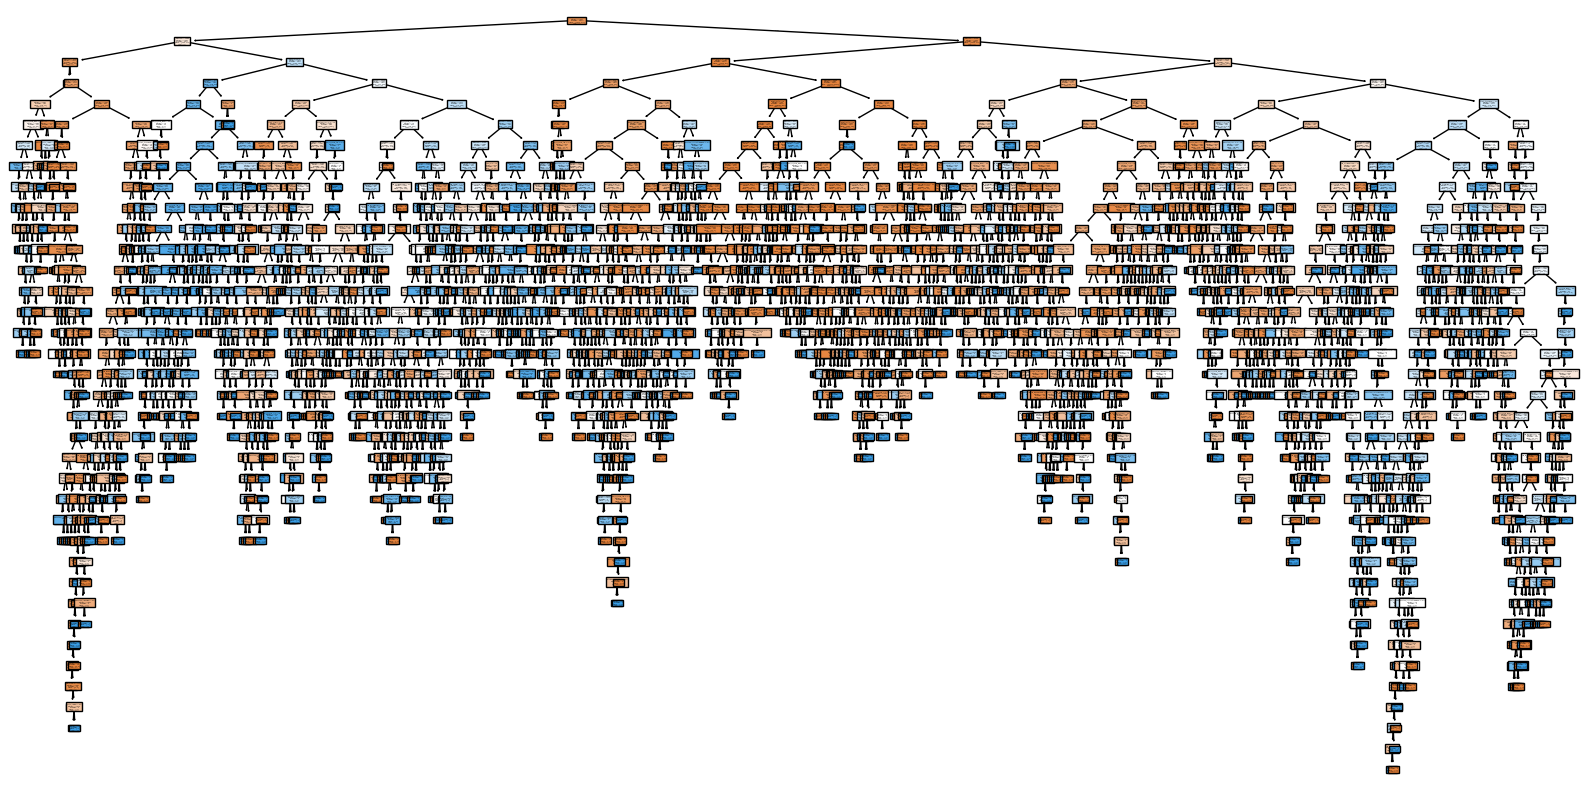

In [8]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, feature_names=X_encoded.columns, class_names=y.unique(), filled=True)
plt.show()

### THANK YOU !!!
